In [1]:
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('/content/geo_df.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Classification as urban/semi-urban/rural_one-hot,log_Population,water_source_category_one-hot,log_angle,#status_id_one-hot,log_days_passed,#adm2_one-hot,log_dist,#pay_one-hot,water_tech_category_one-hot,Water demand (lpcd)_one-hot,latitude,longitude,geometry
0,0,0,0,19.343908,0,9.966469,0,11.388017,0,9.976453,0,0,0,6.601190,3.394098,POINT (3.3940983 6.60119)
1,1,1,1,17.471318,1,9.966516,0,11.381002,1,9.976761,0,0,1,6.674977,3.712242,POINT (3.7122417 6.6749767)
2,2,2,2,16.842817,0,9.966564,1,11.375583,2,9.976714,0,0,2,6.413153,4.087083,POINT (4.0870833 6.4131533)
3,3,3,1,17.471318,0,9.966564,0,11.382084,1,9.976842,0,0,1,6.583227,3.981810,POINT (3.98181 6.5832267)
4,4,4,1,17.471318,0,9.966564,0,11.379920,1,9.976903,0,0,1,6.630905,3.986448,POINT (3.9864483 6.630905)


In [3]:
df=df.iloc[:,2:]
df.head()

,Classification as urban/semi-urban/rural_one-hot,log_Population,water_source_category_one-hot,log_angle,#status_id_one-hot,log_days_passed,#adm2_one-hot,log_dist,#pay_one-hot,water_tech_category_one-hot,Water demand (lpcd)_one-hot,latitude,longitude,geometry
0,0,19.343908,0,9.966469,0,11.388017,0,9.976453,0,0,0,6.601190,3.394098,POINT (3.3940983 6.60119)
1,1,17.471318,1,9.966516,0,11.381002,1,9.976761,0,0,1,6.674977,3.712242,POINT (3.7122417 6.6749767)
2,2,16.842817,0,9.966564,1,11.375583,2,9.976714,0,0,2,6.413153,4.087083,POINT (4.0870833 6.4131533)
3,1,17.471318,0,9.966564,0,11.382084,1,9.976842,0,0,1,6.583227,3.981810,POINT (3.98181 6.5832267)
4,1,17.471318,0,9.966564,0,11.379920,1,9.976903,0,0,1,6.630905,3.986448,POINT (3.9864483 6.630905)


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


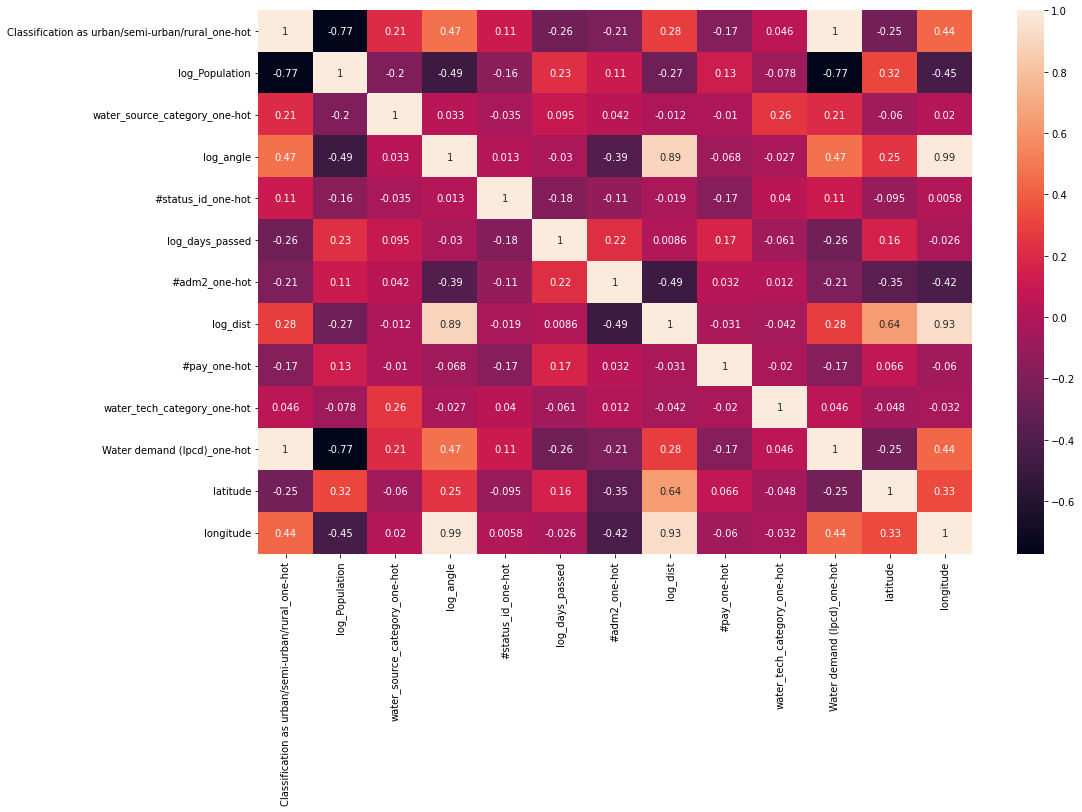

In [5]:
plt.rcParams['figure.figsize']=[16,10]
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:

X = df.drop(["Water demand (lpcd)_one-hot",'geometry'], axis = 1)
y = df['Water demand (lpcd)_one-hot']

In [7]:
# the function below takes in the dataset, and a list of input columns names 
# as model input and a column name to predict for.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, train_size = .6)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 150)

In [9]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [10]:
predictions = rfc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))

[[295   0   0]
 [  0 234   0]
 [  0   0  74]]


In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00        74

    accuracy                           1.00       603
   macro avg       1.00      1.00      1.00       603
weighted avg       1.00      1.00      1.00       603



In [13]:
accuracy_score(y_test, predictions)

1.0

In [14]:
import pickle
# save model
with open('lagos water classifier.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [15]:
# load model
with open('lagos water classifier.pkl', 'rb') as f:
    classifier = pickle.load(f)

In [16]:
X_test

,Classification as urban/semi-urban/rural_one-hot,log_Population,water_source_category_one-hot,log_angle,#status_id_one-hot,log_days_passed,#adm2_one-hot,log_dist,#pay_one-hot,water_tech_category_one-hot,latitude,longitude
993,1,17.881287,0,9.966400,1,11.375039,7,9.976049,0,0,6.500002,2.955250
635,2,18.257337,0,9.966504,1,11.388017,10,9.976560,0,0,6.581960,3.589193
1212,2,16.842817,0,9.966537,1,11.376668,2,9.976520,0,0,6.474090,3.725445
320,0,20.055109,0,9.966453,0,11.377753,3,9.976301,0,0,6.544354,3.271622
328,1,17.471318,1,9.966564,0,11.381002,1,9.976929,0,0,6.676320,4.010803
...,...,...,...,...,...,...,...,...,...,...,...,...
553,2,16.842817,0,9.966564,1,11.375583,2,9.976717,0,0,6.411230,4.094417
886,0,20.055109,0,9.966451,0,11.382624,3,9.976409,0,0,6.614935,3.297795
1333,1,17.881287,0,9.966394,1,11.391244,7,9.975973,0,0,6.416100,2.882062
1382,2,18.257337,0,9.966457,0,11.392854,10,9.976468,1,0,6.638083,3.343843
